In this notebook, we will do EDA and develop NN.

1. Importing Datasets
2. Data Cleaning
3. Visulalizing pairplots
4. Building Artificial Neural Networks
5. Making submission file

In [1]:
import numpy as np
import pandas as pd

import zipfile

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with zipfile.ZipFile("/kaggle/input/flight-delays-fall-2018/flight_delays_train.csv.zip") as z:
    z.extractall(".")

In [3]:
train = pd.read_csv("/kaggle/working/flight_delays_train.csv")
train.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N


Understanding the dataset, and confirming that any incorrect value does not exist in it by checking with total number of months etc.

In [4]:
for col in train.columns:
    uni = train[col].nunique()
    print("Columns: ",col," ","Unique Values: ",uni)

Columns:  Month   Unique Values:  12
Columns:  DayofMonth   Unique Values:  31
Columns:  DayOfWeek   Unique Values:  7
Columns:  DepTime   Unique Values:  1300
Columns:  UniqueCarrier   Unique Values:  22
Columns:  Origin   Unique Values:  289
Columns:  Dest   Unique Values:  289
Columns:  Distance   Unique Values:  1310
Columns:  dep_delayed_15min   Unique Values:  2


Checking for null values in dataset

In [5]:
train.isnull().sum().sort_values()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

The dataset has no null value

In [6]:
with zipfile.ZipFile("/kaggle/input/flight-delays-fall-2018/flight_delays_test.csv.zip") as z:
    z.extractall(".")

In [7]:
test = pd.read_csv("/kaggle/working/flight_delays_test.csv")

Removing the alphabets from Day, Month and Week columns

In [8]:
def clean_alpha(df):
    df.Month = df.Month.str.extract(r"(\d+)")
    df.DayofMonth = df.DayofMonth.str.extract(r"(\d+)")
    df.DayOfWeek = df.DayOfWeek.str.extract(r"(\d+)")


clean_alpha(train)
clean_alpha(test)
train.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N


Encoding all the alphabets based data into numbers

In [9]:
label_encoding = LabelEncoder()
def encode(df):
    df['UniqueCarrier'] = label_encoding.fit_transform(df['UniqueCarrier'])
    df['Origin'] = label_encoding.fit_transform(df['Origin'])
    df['Dest'] = label_encoding.fit_transform(df['Dest'])

encode(train)
train['dep_delayed_15min'] = label_encoding.fit_transform(train['dep_delayed_15min'])
#Writing this seperately since, dep_delayed_15min column is not present in test dataframe


encode(test)
train.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,18,78,732,0
1,4,20,3,1548,18,217,171,834,0
2,9,2,5,1422,20,228,59,416,0


In [10]:
X = train.drop(['dep_delayed_15min'],axis=1)
y = train['dep_delayed_15min']

In [11]:
train.shape

(100000, 9)

Understanding the pairplot between all the parameters with dep_delayed_15min

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


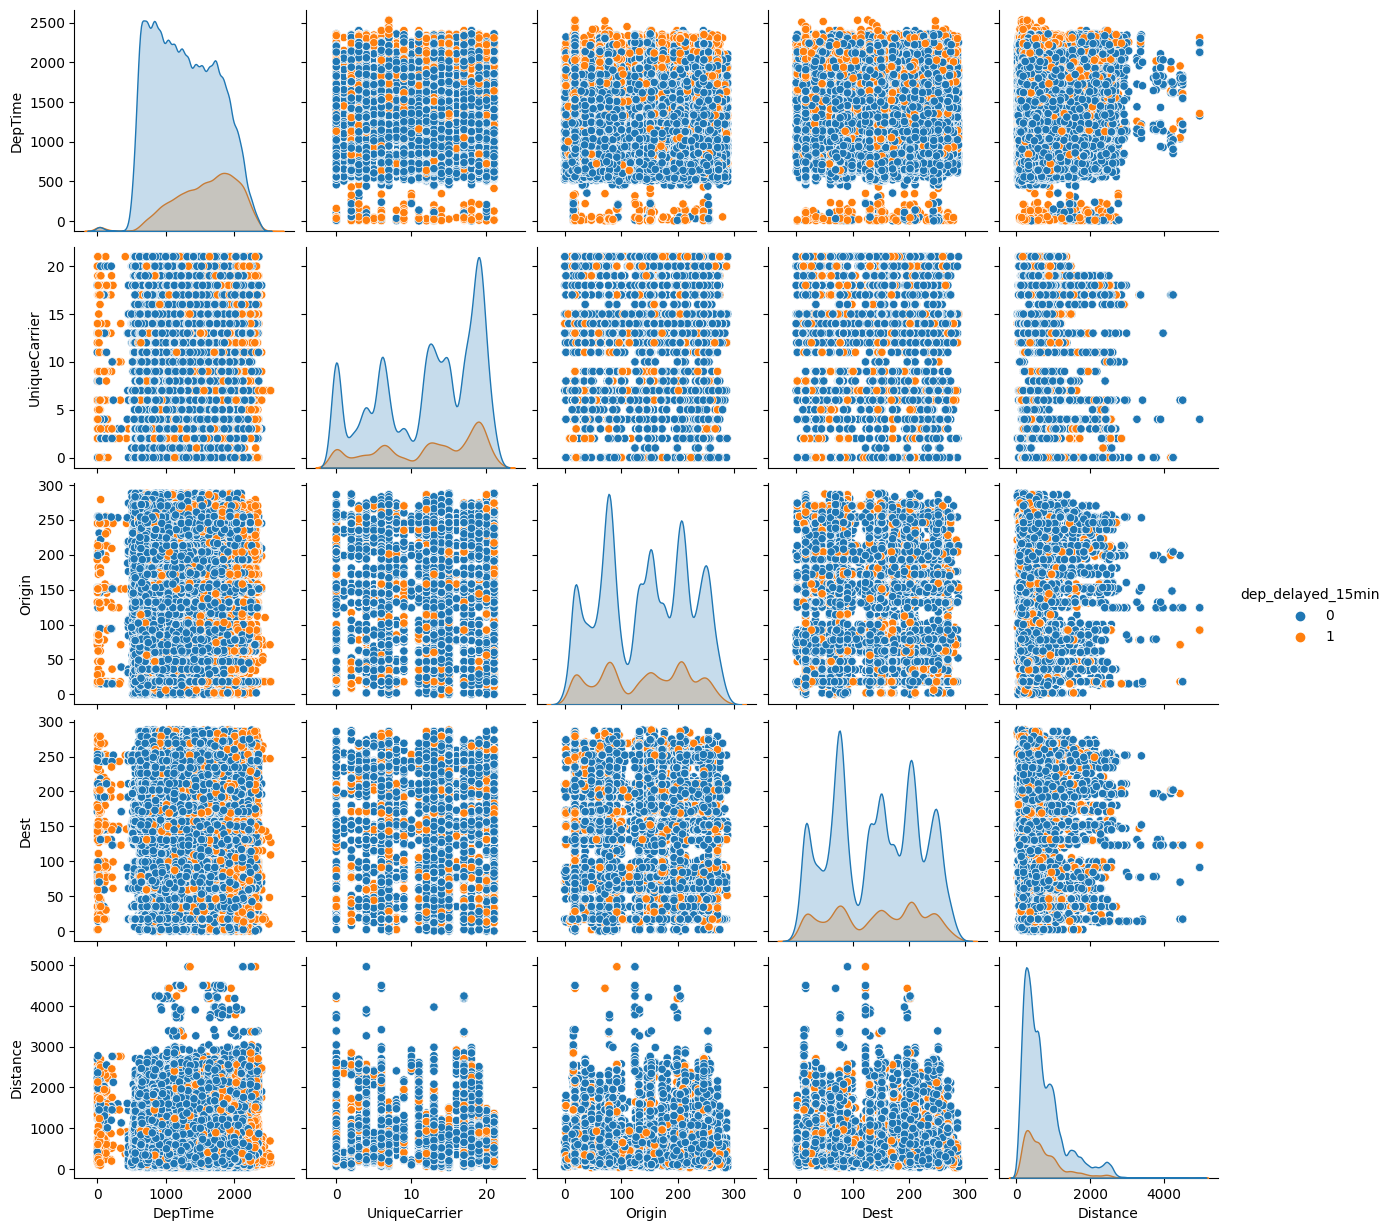

In [12]:
sns.pairplot(train,hue = 'dep_delayed_15min')

Now the pairplot clearly insit that any linear classification will be useless, because of high overlaps. ALgortihms like RandomForest will be efficient. However, in this notebook we will stick towards developing Artificial Neural Network

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.fit_transform(test)

After scaling the data we can feed this into a deep leaning model

In [14]:
model = None
model = keras.Sequential([
    layers.Input(shape = (8,)),
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation = 'sigmoid')
])


model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(X_scaled,y,epochs = 6,batch_size = 64,validation_split = 0.25,shuffle = True)

Epoch 1/6
1172/1172 [==============================] - 11s 5ms/step - loss: 0.4672 - accuracy: 0.8084 - val_loss: 0.4580 - val_accuracy: 0.8090
Epoch 2/6
1172/1172 [==============================] - 5s 4ms/step - loss: 0.4581 - accuracy: 0.8099 - val_loss: 0.4549 - val_accuracy: 0.8089
Epoch 3/6
1172/1172 [==============================] - 5s 4ms/step - loss: 0.4560 - accuracy: 0.8100 - val_loss: 0.4540 - val_accuracy: 0.8090
Epoch 4/6
1172/1172 [==============================] - 5s 4ms/step - loss: 0.4547 - accuracy: 0.8101 - val_loss: 0.4530 - val_accuracy: 0.8100
Epoch 5/6
1172/1172 [==============================] - 6s 5ms/step - loss: 0.4539 - accuracy: 0.8106 - val_loss: 0.4515 - val_accuracy: 0.8115
Epoch 6/6
1172/1172 [==============================] - 6s 5ms/step - loss: 0.4513 - accuracy: 0.8105 - val_loss: 0.4490 - val_accuracy: 0.8105


In [16]:
pred = model.predict(test_scaled)

3125/3125 [==============================] - 5s 2ms/step


Score will be around 0.69

In [17]:
pred = pred.flatten()
sub = pd.Series(pred,name = 'dep_delayed_15min')
sub = sub.reset_index()
sub.columns = ['id', 'dep_delayed_15min']
sub.to_csv("sub.csv",index = False)
sub.head()

,id,dep_delayed_15min
0,0,0.050774
1,1,0.066293
2,2,0.048074
3,3,0.236146
4,4,0.194309
